# Evaluation of saved metrics

In [13]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import glob
import os
import matplotlib.pyplot as plt
from matplotlib import cm

## Dataset Settings

In [14]:
# Use Subset or original labels
subset_labels = False
input_strategies = [1, 2, 3, 4]
min_epoch = 10

In [15]:
path = 'data/eval' 
if subset_labels:
    path = 'data/eval_subset' 

In [16]:
max_value = count = 0
max_name = ""

# summary
df_summary = pd.DataFrame(columns=['Model', 'Input_Strategy', 'Acc_avg', 'Acc_std', 'Micro_Precision_avg', 'Micro_Precision_std', 'Macro_Precision_avg', 'Macro_Precision_std', 'Micro_Recal_avg', 'Micro_Recal_std', 'Micro_Recal_avg', 'Micro_Recal_std', 'Micro_F1_avg', 'Micro_F1_std', 'Macro_F1_avg', 'Macro_F1_std'])
def extractFromFileName(name):
    spl = name.split('/')
    input_strategy = spl[len(spl)-2]
    fullName = spl[len(spl)-1]
    fullName = fullName.split('_')
    name = fullName[0]
    epoch = fullName[len(fullName)-1].split('.')[0]
    return name, input_strategy, epoch

for strategy in input_strategies:
    all_files = glob.glob(path + f"/{strategy}/*.csv")
    for filename in all_files:
        df = pd.read_csv(filename)
        df = df.round(4).set_index("fold").multiply(100)
        # Display Labels
        print("")
        print("")
        name, input_strategy, epoch = extractFromFileName(filename)
        print(f"Model: {name}, Input Strategy: {input_strategy}, Epochs: {epoch}")
        print(filename)
        print("")
        # Add to summary
        if int(epoch) >= min_epoch:
            summary_entry = [name, input_strategy, df["eval_accuracy"]["avg"], df["eval_accuracy"]["std"], df["eval_weighted avg__precision"]["avg"], df["eval_weighted avg__precision"]["std"], df["eval_macro avg__precision"]["avg"], df["eval_macro avg__precision"]["std"], df["eval_weighted avg__recall"]["avg"], df["eval_weighted avg__recall"]["std"], df["eval_macro avg__recall"]["avg"], df["eval_macro avg__recall"]["std"], df["eval_weighted avg__f1-score"]["avg"], df["eval_weighted avg__f1-score"]["std"], df["eval_macro avg__f1-score"]["avg"], df["eval_macro avg__f1-score"]["std"]]
            df_summary.loc[len(df_summary)] = summary_entry
        # Display all Information
        display(df[["eval_accuracy", "eval_weighted avg__precision", "eval_weighted avg__recall", "eval_weighted avg__f1-score", "eval_weighted avg__support"]])
        if(df["eval_accuracy"]["avg"] > max_value):
            max_value = df["eval_accuracy"]["avg"]
            max_name = filename
        display(HTML(df.to_html()))
        count += 1
    



Model: bert-large-uncased, Input Strategy: 1, Epochs: 10
data/eval_subset/1/bert-large-uncased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,70.98,71.12,70.98,70.66,125100.00
2,68.82,69.20,68.82,68.77,125100.00
3,67.28,69.10,67.28,67.60,125000.00
4,68.56,70.45,68.56,69.10,125000.00
avg,68.91,69.97,68.91,69.03,125050.00
std,1.54,0.98,1.54,1.26,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,147.61,84.08,85.14,84.61,79400.0,52.41,69.72,59.84,10900.00,57.14,58.54,57.83,4100.0,70.59,42.35,52.94,8500.00,72.22,65.00,68.42,2000.0,32.24,33.33,32.78,14700.0,35.90,25.45,29.79,5500.0,70.98,57.80,54.22,55.17,125100.00,71.12,70.98,70.66,125100.00,2335.39,5356.70,1000.0
2,169.08,83.52,83.00,83.26,79400.0,47.89,62.96,54.40,10800.00,46.67,51.22,48.84,4100.0,62.30,44.71,52.05,8500.00,64.71,55.00,59.46,2000.0,32.70,35.14,33.88,14800.0,31.58,21.82,25.81,5500.0,68.82,52.77,50.55,51.10,125100.00,69.20,68.82,68.77,125100.00,2458.79,5087.90,1000.0
3,168.55,83.93,82.24,83.08,79400.0,36.53,56.48,44.36,10800.00,44.83,31.71,37.14,4100.0,63.04,34.52,44.62,8400.00,83.33,50.00,62.50,2000.0,34.34,38.78,36.42,14700.0,34.62,32.14,33.33,5600.0,67.28,54.37,46.55,48.78,125000.00,69.10,67.28,67.60,125000.00,2454.63,5092.40,1000.0
4,155.01,83.66,81.34,82.48,79300.0,52.46,58.72,55.41,10900.00,51.06,57.14,53.93,4200.0,66.10,46.43,54.55,8400.00,83.33,50.00,62.50,2000.0,29.76,41.50,34.66,14700.0,41.18,25.45,31.46,5500.0,68.56,58.22,51.51,53.57,125000.00,70.45,68.56,69.10,125000.00,2240.71,5578.60,1000.0
avg,160.06,83.80,82.93,83.36,79375.0,47.32,61.97,53.50,10850.00,49.93,49.65,49.44,4125.0,65.51,42.00,51.04,8450.00,75.90,55.00,63.22,2000.0,32.26,37.19,34.43,14725.0,35.82,26.22,30.10,5525.0,68.91,55.79,50.71,52.16,125050.00,69.97,68.91,69.03,125050.00,2372.38,5278.90,1000.0
std,10.55,0.25,1.62,0.90,50.0,7.51,5.83,6.54,57.74,5.48,12.38,8.98,50.0,3.77,5.26,4.40,57.74,9.12,7.07,3.75,0.0,1.90,3.66,1.53,50.0,4.01,4.31,3.21,50.0,1.54,2.65,3.18,2.81,57.74,0.98,1.54,1.26,57.74,104.78,236.03,0.0




Model: microsoft-deberta-base, Input Strategy: 1, Epochs: 10
data/eval_subset/1/microsoft-deberta-base_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,75.70,74.77,75.70,75.07,125100.00
2,76.58,75.64,76.58,75.99,125100.00
3,76.00,75.32,76.00,75.41,125000.00
4,76.48,77.29,76.48,76.80,125000.00
avg,76.19,75.75,76.19,75.82,125050.00
std,0.41,1.08,0.41,0.76,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,157.60,84.15,86.90,85.50,79400.0,71.32,84.40,77.31,10900.00,73.81,75.61,74.70,4100.0,83.82,67.06,74.51,8500.00,84.21,80.00,82.05,2000.0,34.71,28.57,31.34,14700.0,36.54,34.55,35.51,5500.0,75.70,66.94,65.30,65.85,125100.00,74.77,75.70,75.07,125100.00,1399.62,8938.20,1000.0
2,161.16,85.98,88.04,86.99,79400.0,69.67,78.70,73.91,10800.00,66.67,82.93,73.91,4100.0,68.00,60.00,63.75,8500.00,73.68,70.00,71.79,2000.0,48.82,41.89,45.09,14800.0,29.55,23.64,26.26,5500.0,76.58,63.20,63.60,63.10,125100.00,75.64,76.58,75.99,125100.00,1393.99,8974.20,1000.0
3,175.74,84.46,88.29,86.33,79400.0,58.65,72.22,64.73,10800.00,84.38,65.85,73.97,4100.0,78.67,70.24,74.21,8400.00,86.67,65.00,74.29,2000.0,48.25,37.41,42.15,14700.0,33.33,30.36,31.78,5600.0,76.00,67.77,61.34,63.92,125000.00,75.32,76.00,75.41,125000.00,1192.78,10479.70,1000.0
4,169.22,86.58,86.25,86.42,79300.0,81.25,71.56,76.10,10900.00,58.54,57.14,57.83,4200.0,78.95,71.43,75.00,8400.00,88.89,80.00,84.21,2000.0,43.93,51.70,47.50,14700.0,32.14,32.73,32.43,5500.0,76.48,67.18,64.40,65.64,125000.00,77.29,76.48,76.80,125000.00,825.36,15145.00,1000.0
avg,165.93,85.29,87.37,86.31,79375.0,70.22,76.72,73.01,10850.00,70.85,70.38,70.10,4125.0,77.36,67.18,71.87,8450.00,83.36,73.75,78.09,2000.0,43.93,39.89,41.52,14725.0,32.89,30.32,31.50,5525.0,76.19,66.27,63.66,64.63,125050.00,75.75,76.19,75.82,125050.00,1202.94,10884.28,1000.0
std,8.15,1.18,0.96,0.61,50.0,9.26,6.05,5.70,57.74,10.97,11.26,8.19,50.0,6.67,5.13,5.42,57.74,6.73,7.50,5.98,0.0,6.52,9.62,7.13,50.0,2.90,4.77,3.85,50.0,0.41,2.08,1.70,1.33,57.74,1.08,0.41,0.76,57.74,269.48,2929.91,0.0




Model: bert-base-uncased, Input Strategy: 1, Epochs: 10
data/eval_subset/1/bert-base-uncased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,69.70,69.66,69.70,69.08,125100.00
2,69.94,70.78,69.94,69.86,125100.00
3,70.64,70.56,70.64,70.04,125000.00
4,71.92,72.24,71.92,71.77,125000.00
avg,70.55,70.81,70.55,70.19,125050.00
std,0.99,1.07,0.99,1.13,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,155.30,82.96,84.63,83.79,79400.0,43.02,67.89,52.67,10900.00,47.22,41.46,44.16,4100.0,60.66,43.53,50.68,8500.00,85.71,60.00,70.59,2000.0,37.31,34.01,35.59,14700.0,41.67,18.18,25.32,5500.0,69.70,56.94,49.96,51.83,125100.00,69.66,69.70,69.08,125100.00,682.69,18324.50,1000.0
2,147.39,84.18,83.75,83.96,79400.0,43.90,66.67,52.94,10800.00,56.00,34.15,42.42,4100.0,63.33,44.71,52.41,8500.00,76.47,65.00,70.27,2000.0,36.02,39.19,37.54,14800.0,44.12,27.27,33.71,5500.0,69.94,57.72,51.53,53.32,125100.00,70.78,69.94,69.86,125100.00,799.48,15647.70,1000.0
3,150.17,82.83,85.64,84.21,79400.0,40.59,63.89,49.64,10800.00,57.14,39.02,46.38,4100.0,68.66,54.76,60.93,8400.00,92.86,65.00,76.47,2000.0,37.82,30.61,33.83,14700.0,45.16,25.00,32.18,5600.0,70.64,60.72,51.99,54.81,125000.00,70.56,70.64,70.04,125000.00,799.46,15635.50,1000.0
4,132.03,84.33,85.50,84.91,79300.0,55.77,53.21,54.46,10900.00,56.52,30.95,40.00,4200.0,65.15,51.19,57.33,8400.00,82.35,70.00,75.68,2000.0,40.41,53.06,45.88,14700.0,34.88,27.27,30.61,5500.0,71.92,59.92,53.03,55.55,125000.00,72.24,71.92,71.77,125000.00,607.61,20572.30,1000.0
avg,146.22,83.57,84.88,84.22,79375.0,45.82,62.91,52.43,10850.00,54.22,36.40,43.24,4125.0,64.45,48.55,55.34,8450.00,84.35,65.00,73.25,2000.0,37.89,39.22,38.21,14725.0,41.46,24.43,30.46,5525.0,70.55,58.82,51.63,53.88,125050.00,70.81,70.55,70.19,125050.00,722.31,17545.00,1000.0
std,10.01,0.79,0.87,0.49,50.0,6.78,6.68,2.02,57.74,4.69,4.74,2.70,50.0,3.36,5.34,4.67,57.74,6.84,4.08,3.28,0.0,1.84,9.88,5.33,50.0,4.62,4.30,3.65,50.0,0.99,1.79,1.28,1.65,57.74,1.07,0.99,1.13,57.74,94.22,2381.74,0.0




Model: bert-base-cased, Input Strategy: 1, Epochs: 10
data/eval_subset/1/bert-base-cased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,71.22,70.85,71.22,70.72,125100.00
2,69.70,69.72,69.70,69.38,125100.00
3,67.20,67.63,67.20,66.70,125000.00
4,69.28,69.09,69.28,68.96,125000.00
avg,69.35,69.32,69.35,68.94,125050.00
std,1.66,1.34,1.66,1.67,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,167.01,82.72,85.01,83.85,79400.0,51.43,66.06,57.83,10900.00,57.69,36.59,44.78,4100.0,67.65,54.12,60.13,8500.00,73.68,70.00,71.79,2000.0,36.91,37.41,37.16,14700.0,42.42,25.45,31.82,5500.0,71.22,58.93,53.52,55.34,125100.00,70.85,71.22,70.72,125100.00,675.34,18524.00,1000.0
2,161.37,83.44,85.01,84.22,79400.0,44.37,58.33,50.40,10800.00,50.00,26.83,34.92,4100.0,58.73,43.53,50.00,8500.00,78.57,55.00,64.71,2000.0,37.58,39.86,38.69,14800.0,36.36,29.09,32.32,5500.0,69.70,55.58,48.24,50.75,125100.00,69.72,69.70,69.38,125100.00,881.13,14197.60,1000.0
3,176.05,81.72,83.88,82.78,79400.0,33.16,59.26,42.52,10800.00,51.72,36.59,42.86,4100.0,62.50,41.67,50.00,8400.00,91.67,55.00,68.75,2000.0,32.71,23.81,27.56,14700.0,36.84,25.00,29.79,5600.0,67.20,55.76,46.46,49.18,125000.00,67.63,67.20,66.70,125000.00,880.11,14202.80,1000.0
4,156.99,82.78,84.87,83.81,79300.0,44.70,54.13,48.96,10900.00,44.83,30.95,36.62,4200.0,71.19,50.00,58.74,8400.00,72.73,80.00,76.19,2000.0,32.39,31.29,31.83,14700.0,32.08,30.91,31.48,5500.0,69.28,54.38,51.74,52.52,125000.00,69.09,69.28,68.96,125000.00,630.75,19817.80,1000.0
avg,165.35,82.66,84.69,83.67,79375.0,43.41,59.44,49.93,10850.00,51.06,32.74,39.79,4125.0,65.02,47.33,54.72,8450.00,79.16,65.00,70.36,2000.0,34.90,33.10,33.81,14725.0,36.93,27.61,31.35,5525.0,69.35,56.16,49.99,51.95,125050.00,69.32,69.35,68.94,125050.00,766.83,16685.55,1000.0
std,8.23,0.71,0.55,0.62,50.0,7.57,4.94,6.28,57.74,5.30,4.75,4.76,50.0,5.50,5.77,5.48,57.74,8.72,12.25,4.85,0.0,2.73,7.16,5.10,50.0,4.25,2.86,1.10,50.0,1.66,1.94,3.22,2.64,57.74,1.34,1.66,1.67,57.74,132.65,2918.04,0.0




Model: bert-large-cased, Input Strategy: 1, Epochs: 10
data/eval_subset/1/bert-large-cased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,70.34,71.25,70.34,70.49,125100.00
2,70.98,70.97,70.98,70.87,125100.00
3,68.08,69.59,68.08,68.40,125000.00
4,70.24,72.00,70.24,70.86,125000.00
avg,69.91,70.95,69.91,70.16,125050.00
std,1.26,1.01,1.26,1.18,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,135.41,84.24,83.50,83.87,79400.0,52.17,66.06,58.30,10900.00,51.28,48.78,50.00,4100.0,72.73,47.06,57.14,8500.00,76.47,65.00,70.27,2000.0,33.72,39.46,36.36,14700.0,32.56,25.45,28.57,5500.0,70.34,57.60,53.62,54.93,125100.00,71.25,70.34,70.49,125100.00,2319.10,5394.30,1000.0
2,142.84,85.10,84.89,84.99,79400.0,54.48,67.59,60.33,10800.00,42.50,41.46,41.98,4100.0,52.63,47.06,49.69,8500.00,73.33,55.00,62.86,2000.0,37.16,37.16,37.16,14800.0,39.13,32.73,35.64,5500.0,70.98,54.91,52.27,53.24,125100.00,70.97,70.98,70.87,125100.00,2587.25,4835.30,1000.0
3,168.35,83.93,82.24,83.08,79400.0,47.14,61.11,53.23,10800.00,36.00,43.90,39.56,4100.0,68.09,38.10,48.85,8400.00,86.67,65.00,74.29,2000.0,32.35,37.41,34.70,14700.0,28.00,25.00,26.42,5600.0,68.08,54.60,50.40,51.45,125000.00,69.59,68.08,68.40,125000.00,2578.63,4847.50,1000.0
4,145.77,85.70,83.86,84.77,79300.0,47.50,52.29,49.78,10900.00,34.55,45.24,39.18,4200.0,80.00,52.38,63.31,8400.00,88.24,75.00,81.08,2000.0,37.95,42.86,40.26,14700.0,24.59,27.27,25.86,5500.0,70.24,56.93,54.13,54.89,125000.00,72.00,70.24,70.86,125000.00,2247.55,5561.60,1000.0
avg,148.09,84.74,83.62,84.18,79375.0,50.32,61.76,55.41,10850.00,41.08,44.85,42.68,4125.0,68.36,46.15,54.75,8450.00,81.18,65.00,72.12,2000.0,35.30,39.22,37.12,14725.0,31.07,27.61,29.12,5525.0,69.91,56.01,52.60,53.63,125050.00,70.95,69.91,70.16,125050.00,2433.13,5159.68,1000.0
std,14.19,0.80,1.09,0.88,50.0,3.59,6.89,4.80,57.74,7.63,3.05,5.04,50.0,11.58,5.93,6.82,57.74,7.39,8.16,7.62,0.0,2.69,2.63,2.33,50.0,6.29,3.55,4.50,50.0,1.26,1.48,1.67,1.65,57.74,1.01,1.26,1.18,57.74,175.47,373.84,0.0




Model: microsoft-deberta-base, Input Strategy: 1, Epochs: 5
data/eval_subset/1/microsoft-deberta-base_epoch_5.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,67.23,65.12,67.23,65.43,125100.00
2,66.83,64.21,66.83,64.87,125100.00
3,67.60,68.83,67.60,67.89,125000.00
4,64.48,68.14,64.48,65.20,125000.00
avg,66.53,66.58,66.53,65.85,125050.00
std,1.40,2.25,1.40,1.38,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,91.83,79.74,84.26,81.94,79400.0,47.52,44.04,45.71,10900.00,28.57,4.88,8.33,4100.0,44.25,58.82,50.51,8500.00,51.61,80.00,62.75,2000.0,35.17,34.69,34.93,14700.0,33.33,9.09,14.29,5500.0,67.23,45.74,45.11,42.64,125100.00,65.12,67.23,65.43,125100.00,1254.74,9970.20,500.0
2,88.74,79.61,86.52,82.92,79400.0,38.24,36.11,37.14,10800.00,28.57,4.88,8.33,4100.0,47.17,29.41,36.23,8500.00,60.00,60.00,60.00,2000.0,36.11,43.92,39.63,14800.0,23.08,10.91,14.81,5500.0,66.83,44.68,38.82,39.87,125100.00,64.21,66.83,64.87,125100.00,1254.26,9974.00,500.0
3,93.61,83.90,80.73,82.28,79400.0,42.86,55.56,48.39,10800.00,57.14,29.27,38.71,4100.0,48.91,53.57,51.14,8400.00,59.09,65.00,61.90,2000.0,34.68,40.82,37.50,14700.0,36.84,25.00,29.79,5600.0,67.60,51.92,49.99,49.96,125000.00,68.83,67.60,67.89,125000.00,1152.48,10846.20,500.0
4,94.78,85.26,78.06,81.50,79300.0,40.94,47.71,44.07,10900.00,66.67,9.52,16.67,4200.0,44.44,42.86,43.64,8400.00,57.14,80.00,66.67,2000.0,30.17,47.62,36.94,14700.0,18.00,16.36,17.14,5500.0,64.48,48.95,46.02,43.80,125000.00,68.14,64.48,65.20,125000.00,966.70,12930.50,500.0
avg,92.24,82.13,82.39,82.16,79375.0,42.39,45.85,43.83,10850.00,45.24,12.14,18.01,4125.0,46.19,46.17,45.38,8450.00,56.96,71.25,62.83,2000.0,34.03,41.76,37.25,14725.0,27.81,15.34,19.01,5525.0,66.53,47.82,44.99,44.07,125050.00,66.58,66.53,65.85,125050.00,1157.04,10930.22,500.0
std,2.63,2.89,3.75,0.60,50.0,3.91,8.08,4.80,57.74,19.63,11.63,14.35,50.0,2.25,13.00,6.98,57.74,3.76,10.31,2.80,0.0,2.64,5.47,1.93,50.0,8.77,7.14,7.29,50.0,1.40,3.28,4.62,4.26,57.74,2.25,1.40,1.38,57.74,135.70,1395.73,0.0




Model: bert-large-uncased, Input Strategy: 2, Epochs: 10
data/eval_subset/2/bert-large-uncased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,72.90,73.93,72.90,73.02,125100.00
2,70.98,72.78,70.98,71.54,125100.00
3,70.56,70.95,70.56,70.33,125000.00
4,70.08,72.25,70.08,70.78,125000.00
avg,71.13,72.48,71.13,71.42,125050.00
std,1.24,1.24,1.24,1.18,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,138.17,88.89,86.65,87.76,79400.0,44.16,62.39,51.71,10900.00,43.90,43.90,43.90,4100.0,69.35,50.59,58.50,8500.00,61.11,55.00,57.89,2000.0,42.77,50.34,46.25,14700.0,34.48,18.18,23.81,5500.0,72.90,54.95,52.44,52.83,125100.00,73.93,72.90,73.02,125100.00,2386.18,5242.70,1000.0
2,155.99,88.24,84.13,86.14,79400.0,43.40,63.89,51.69,10800.00,37.50,36.59,37.04,4100.0,58.33,41.18,48.28,8500.00,78.57,55.00,64.71,2000.0,43.90,48.65,46.15,14800.0,31.58,32.73,32.14,5500.0,70.98,54.50,51.74,52.31,125100.00,72.78,70.98,71.54,125100.00,2600.26,4811.10,1000.0
3,139.38,84.96,86.78,85.86,79400.0,37.66,53.70,44.27,10800.00,60.87,34.15,43.75,4100.0,62.96,40.48,49.28,8400.00,72.22,65.00,68.42,2000.0,41.48,38.10,39.72,14700.0,32.73,32.14,32.43,5600.0,70.56,56.13,50.05,51.96,125000.00,70.95,70.56,70.33,125000.00,2597.71,4811.90,1000.0
4,148.75,87.77,82.35,84.97,79300.0,44.09,51.38,47.46,10900.00,42.86,21.43,28.57,4200.0,64.10,59.52,61.73,8400.00,77.78,70.00,73.68,2000.0,36.79,53.06,43.45,14700.0,32.00,29.09,30.48,5500.0,70.08,55.06,52.40,52.91,125000.00,72.25,70.08,70.78,125000.00,2335.19,5352.90,1000.0
avg,145.57,87.46,84.98,86.18,79375.0,42.33,57.84,48.78,10850.00,46.28,34.02,38.32,4125.0,63.69,47.94,54.45,8450.00,72.42,61.25,66.18,2000.0,41.24,47.54,43.89,14725.0,32.70,28.04,29.72,5525.0,71.13,55.16,51.66,52.50,125050.00,72.48,71.13,71.42,125050.00,2479.84,5054.65,1000.0
std,8.40,1.73,2.13,1.16,50.0,3.13,6.22,3.61,57.74,10.12,9.36,7.24,50.0,4.53,8.99,6.69,57.74,8.05,7.50,6.64,0.0,3.12,6.55,3.07,50.0,1.28,6.76,4.03,50.0,1.24,0.69,1.12,0.45,57.74,1.24,1.24,1.18,57.74,139.15,284.35,0.0




Model: microsoft-deberta-base, Input Strategy: 2, Epochs: 10
data/eval_subset/2/microsoft-deberta-base_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,75.14,74.00,75.14,74.17,125100.00
2,76.98,76.39,76.98,76.50,125100.00
3,73.68,74.12,73.68,73.62,125000.00
4,73.84,75.29,73.84,74.38,125000.00
avg,74.91,74.95,74.91,74.67,125050.00
std,1.53,1.12,1.53,1.26,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,154.68,84.71,87.91,86.28,79400.0,56.94,75.23,64.82,10900.00,58.49,75.61,65.96,4100.0,75.00,63.53,68.79,8500.00,88.89,80.00,84.21,2000.0,40.00,28.57,33.33,14700.0,48.57,30.91,37.78,5500.0,75.14,64.66,63.11,63.02,125100.00,74.00,75.14,74.17,125100.00,1493.15,8378.20,1000.0
2,150.53,86.27,89.42,87.82,79400.0,58.06,66.67,62.07,10800.00,70.45,75.61,72.94,4100.0,75.36,61.18,67.53,8500.00,87.50,70.00,77.78,2000.0,47.83,44.59,46.15,14800.0,48.65,32.73,39.13,5500.0,76.98,67.73,62.89,64.77,125100.00,76.39,76.98,76.50,125100.00,1484.19,8428.80,1000.0
3,160.33,83.62,86.78,85.17,79400.0,51.28,55.56,53.33,10800.00,92.31,58.54,71.64,4100.0,87.30,65.48,74.83,8400.00,87.50,70.00,77.78,2000.0,38.57,36.73,37.63,14700.0,39.06,44.64,41.67,5600.0,73.68,68.52,59.67,63.15,125000.00,74.12,73.68,73.62,125000.00,1332.99,9377.40,1000.0
4,155.98,87.12,82.72,84.86,79300.0,56.56,63.30,59.74,10900.00,67.65,54.76,60.53,4200.0,75.00,71.43,73.17,8400.00,77.27,85.00,80.95,2000.0,42.63,55.10,48.07,14700.0,34.69,30.91,32.69,5500.0,73.84,62.99,63.32,62.86,125000.00,75.29,73.84,74.38,125000.00,959.27,13030.80,1000.0
avg,155.38,85.43,86.71,86.03,79375.0,55.71,65.19,59.99,10850.00,72.22,66.13,67.77,4125.0,78.17,65.40,71.08,8450.00,85.29,76.25,80.18,2000.0,42.26,41.25,41.30,14725.0,42.74,34.80,37.82,5525.0,74.91,65.97,62.25,63.45,125050.00,74.95,74.91,74.67,125050.00,1317.40,9803.80,1000.0
std,4.04,1.57,2.87,1.34,50.0,3.02,8.15,4.90,57.74,14.33,11.05,5.70,50.0,6.09,4.39,3.48,57.74,5.39,7.50,3.08,0.0,4.08,11.32,6.98,50.0,7.00,6.62,3.78,50.0,1.53,2.60,1.72,0.89,57.74,1.12,1.53,1.26,57.74,249.80,2199.87,0.0




Model: bert-base-uncased, Input Strategy: 2, Epochs: 10
data/eval_subset/2/bert-base-uncased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,72.66,71.82,72.66,71.84,125100.00
2,72.82,72.11,72.82,72.14,125100.00
3,70.32,70.81,70.32,70.10,125000.00
4,73.20,74.17,73.20,73.42,125000.00
avg,72.25,72.23,72.25,71.87,125050.00
std,1.31,1.41,1.31,1.37,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,134.09,85.19,88.41,86.77,79400.0,52.08,68.81,59.29,10900.00,31.03,21.95,25.71,4100.0,62.69,49.41,55.26,8500.00,81.82,45.00,58.06,2000.0,40.69,40.14,40.41,14700.0,41.94,23.64,30.23,5500.0,72.66,56.49,48.19,50.82,125100.00,71.82,72.66,71.84,125100.00,750.08,16678.30,1000.0
2,139.63,85.07,88.29,86.65,79400.0,49.31,65.74,56.35,10800.00,50.00,46.34,48.10,4100.0,62.90,45.88,53.06,8500.00,80.00,60.00,68.57,2000.0,41.04,37.16,39.01,14800.0,41.18,25.45,31.46,5500.0,72.82,58.50,52.70,54.74,125100.00,72.11,72.82,72.14,125100.00,912.93,13703.20,1000.0
3,150.04,84.65,86.15,85.39,79400.0,41.40,60.19,49.06,10800.00,41.38,29.27,34.29,4100.0,69.35,51.19,58.90,8400.00,100.00,50.00,66.67,2000.0,33.10,32.65,32.88,14700.0,43.59,30.36,35.79,5600.0,70.32,59.07,48.54,51.85,125000.00,70.81,70.32,70.10,125000.00,913.47,13684.10,1000.0
4,137.39,88.07,85.62,86.83,79300.0,49.24,59.63,53.94,10900.00,32.35,26.19,28.95,4200.0,72.46,59.52,65.36,8400.00,70.59,60.00,64.86,2000.0,43.68,56.46,49.26,14700.0,40.54,27.27,32.61,5500.0,73.20,56.71,53.53,54.54,125000.00,74.17,73.20,73.42,125000.00,697.35,17925.00,1000.0
avg,140.29,85.75,87.12,86.41,79375.0,48.01,63.59,54.66,10850.00,38.69,30.94,34.26,4125.0,66.85,51.50,58.15,8450.00,83.10,53.75,64.54,2000.0,39.63,41.60,40.39,14725.0,41.81,26.68,32.52,5525.0,72.25,57.69,50.74,52.99,125050.00,72.23,72.25,71.87,125050.00,818.46,15497.65,1000.0
std,6.89,1.56,1.44,0.68,50.0,4.60,4.44,4.33,57.74,8.83,10.70,9.88,50.0,4.85,5.78,5.38,57.74,12.29,7.50,4.58,0.0,4.55,10.37,6.76,50.0,1.32,2.87,2.38,50.0,1.31,1.29,2.76,1.96,57.74,1.41,1.31,1.37,57.74,111.50,2144.37,0.0




Model: bert-base-cased, Input Strategy: 2, Epochs: 10
data/eval_subset/2/bert-base-cased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,71.62,70.52,71.62,70.81,125100.00
2,72.74,73.44,72.74,72.98,125100.00
3,68.88,69.56,68.88,68.85,125000.00
4,70.48,71.69,70.48,70.94,125000.00
avg,70.93,71.31,70.93,70.89,125050.00
std,1.65,1.67,1.65,1.69,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,141.19,84.44,88.16,86.26,79400.0,47.79,59.63,53.06,10900.00,39.29,26.83,31.88,4100.0,56.67,40.00,46.90,8500.00,70.00,70.00,70.00,2000.0,41.01,38.78,39.86,14700.0,38.46,27.27,31.91,5500.0,71.62,53.95,50.10,51.41,125100.00,70.52,71.62,70.81,125100.00,745.72,16775.60,1000.0
2,144.27,87.24,86.15,86.69,79400.0,52.99,57.41,55.11,10800.00,48.48,39.02,43.24,4100.0,60.87,49.41,54.55,8500.00,75.00,60.00,66.67,2000.0,41.76,47.97,44.65,14800.0,37.10,41.82,39.32,5500.0,72.74,57.64,54.54,55.75,125100.00,73.44,72.74,72.98,125100.00,974.36,12839.10,1000.0
3,151.75,84.66,84.13,84.40,79400.0,38.27,57.41,45.93,10800.00,31.82,17.07,22.22,4100.0,66.67,47.62,55.56,8400.00,64.71,55.00,59.46,2000.0,36.77,38.78,37.75,14700.0,35.56,28.57,31.68,5600.0,68.88,51.21,46.94,48.14,125000.00,69.56,68.88,68.85,125000.00,977.00,12794.30,1000.0
4,153.56,86.97,83.35,85.13,79300.0,43.85,52.29,47.70,10900.00,32.35,26.19,28.95,4200.0,63.29,59.52,61.35,8400.00,70.59,60.00,64.86,2000.0,40.98,51.02,45.45,14700.0,31.91,27.27,29.41,5500.0,70.48,52.85,51.38,51.84,125000.00,71.69,70.48,70.94,125000.00,724.84,17245.20,1000.0
avg,147.69,85.83,85.45,85.62,79375.0,45.73,56.69,50.45,10850.00,37.99,27.28,31.57,4125.0,61.87,49.14,54.59,8450.00,70.07,61.25,65.25,2000.0,40.13,44.14,41.93,14725.0,35.76,31.23,33.08,5525.0,70.93,53.91,50.74,51.78,125050.00,71.31,70.93,70.89,125050.00,855.48,14913.55,1000.0
std,5.91,1.48,2.16,1.05,50.0,6.22,3.11,4.34,57.74,7.78,9.01,8.77,50.0,4.21,8.04,5.94,57.74,4.22,6.29,4.41,0.0,2.27,6.31,3.72,50.0,2.82,7.08,4.31,50.0,1.65,2.73,3.15,3.12,57.74,1.67,1.65,1.69,57.74,139.06,2428.88,0.0




Model: bert-large-cased, Input Strategy: 2, Epochs: 10
data/eval_subset/2/bert-large-cased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,72.66,72.65,72.66,72.25,125100.00
2,72.18,73.87,72.18,72.75,125100.00
3,71.04,70.80,71.04,70.42,125000.00
4,72.08,73.67,72.08,72.40,125000.00
avg,71.99,72.75,71.99,71.95,125050.00
std,0.68,1.41,0.68,1.04,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,134.70,85.41,85.52,85.46,79400.0,51.01,69.72,58.91,10900.00,53.66,53.66,53.66,4100.0,61.18,61.18,61.18,8500.00,91.67,55.00,68.75,2000.0,40.69,40.14,40.41,14700.0,41.67,18.18,25.32,5500.0,72.66,60.75,54.77,56.24,125100.00,72.65,72.66,72.25,125100.00,2378.99,5258.50,1000.0
2,131.74,88.38,84.26,86.27,79400.0,46.85,62.04,53.39,10800.00,38.89,51.22,44.21,4100.0,56.92,43.53,49.33,8500.00,84.62,55.00,66.67,2000.0,45.51,51.35,48.25,14800.0,42.31,40.00,41.12,5500.0,72.18,57.64,55.34,55.61,125100.00,73.87,72.18,72.75,125100.00,2718.38,4602.00,1000.0
3,144.01,84.68,87.03,85.84,79400.0,42.59,63.89,51.11,10800.00,45.00,43.90,44.44,4100.0,60.78,36.90,45.93,8400.00,87.50,70.00,77.78,2000.0,40.00,35.37,37.55,14700.0,37.14,23.21,28.57,5600.0,71.04,56.81,51.47,53.03,125000.00,70.80,71.04,70.42,125000.00,2714.97,4604.10,1000.0
4,125.67,87.92,85.37,86.63,79300.0,47.76,58.72,52.67,10900.00,39.39,30.95,34.67,4200.0,71.15,44.05,54.41,8400.00,81.25,65.00,72.22,2000.0,40.39,55.78,46.86,14700.0,35.71,27.27,30.93,5500.0,72.08,57.66,52.45,54.06,125000.00,73.67,72.08,72.40,125000.00,2367.67,5279.50,1000.0
avg,134.03,86.60,85.54,86.05,79375.0,47.05,63.59,54.02,10850.00,44.24,44.93,44.25,4125.0,62.51,46.41,52.71,8450.00,86.26,61.25,71.35,2000.0,41.65,45.66,43.27,14725.0,39.21,27.17,31.48,5525.0,71.99,58.22,53.51,54.73,125050.00,72.75,71.99,71.95,125050.00,2545.00,4936.03,1000.0
std,7.64,1.83,1.14,0.51,50.0,3.47,4.62,3.40,57.74,6.87,10.20,7.75,50.0,6.07,10.36,6.63,57.74,4.42,7.50,4.86,0.0,2.59,9.51,5.12,50.0,3.27,9.33,6.82,50.0,0.68,1.74,1.85,1.46,57.74,1.41,0.68,1.04,57.74,198.29,384.58,0.0




Model: microsoft-deberta-base, Input Strategy: 2, Epochs: 5
data/eval_subset/2/microsoft-deberta-base_epoch_5.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,68.19,66.18,68.19,66.69,125100.00
2,68.27,70.10,68.27,68.31,125100.00
3,67.04,67.72,67.04,66.78,125000.00
4,66.56,68.92,66.56,67.12,125000.00
avg,67.51,68.23,67.51,67.23,125050.00
std,0.85,1.68,0.85,0.75,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,85.17,82.45,86.40,84.38,79400.0,40.74,40.37,40.55,10900.00,0.00,0.00,0.00,4100.0,40.35,54.12,46.23,8500.00,100.00,25.0,40.00,2000.0,40.13,41.50,40.80,14700.0,28.21,20.00,23.40,5500.0,68.19,47.41,38.20,39.34,125100.00,66.18,68.19,66.69,125100.00,1307.83,9565.50,500.0
2,87.78,88.38,82.37,85.27,79400.0,35.86,48.15,41.11,10800.00,30.00,7.32,11.76,4100.0,39.53,60.00,47.66,8500.00,80.00,60.0,68.57,2000.0,39.49,52.03,44.90,14800.0,29.41,9.09,13.89,5500.0,68.27,48.95,45.56,44.74,125100.00,70.10,68.27,68.31,125100.00,1302.48,9604.80,500.0
3,86.23,85.16,82.37,83.74,79400.0,33.99,48.15,39.85,10800.00,30.77,9.76,14.81,4100.0,51.76,52.38,52.07,8400.00,52.00,65.0,57.78,2000.0,35.11,44.90,39.40,14700.0,27.78,8.93,13.51,5600.0,67.04,45.22,44.50,43.02,125000.00,67.72,67.04,66.78,125000.00,1218.09,10262.00,500.0
4,86.29,89.22,79.32,83.98,79300.0,33.09,42.20,37.10,10900.00,0.00,0.00,0.00,4200.0,43.97,60.71,51.00,8400.00,55.56,50.0,52.63,2000.0,37.72,58.50,45.87,14700.0,26.32,18.18,21.51,5500.0,66.56,40.84,44.13,41.73,125000.00,68.92,66.56,67.12,125000.00,1035.19,12075.10,500.0
avg,86.37,86.30,82.61,84.34,79375.0,35.92,44.72,39.65,10850.00,15.19,4.27,6.64,4125.0,43.90,56.80,49.24,8450.00,71.89,50.0,54.75,2000.0,38.11,49.23,42.74,14725.0,27.93,14.05,18.08,5525.0,67.51,45.61,43.10,42.21,125050.00,68.23,67.51,67.23,125050.00,1215.90,10376.85,500.0
std,1.07,3.11,2.90,0.67,50.0,3.41,4.03,1.78,57.74,17.55,5.03,7.77,50.0,5.58,4.17,2.75,57.74,22.50,17.8,11.86,0.0,2.25,7.58,3.13,50.0,1.28,5.87,5.12,50.0,0.85,3.53,3.32,2.28,57.74,1.68,0.85,0.75,57.74,127.29,1176.38,0.0




Model: bert-base-uncased, Input Strategy: 3, Epochs: 2
data/eval_subset/3/bert-base-uncased_epoch_2.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,69.62,64.36,69.62,66.59,125100.00
2,67.55,61.39,67.55,64.19,125100.00
3,65.92,62.63,65.92,63.31,125000.00
4,68.08,63.01,68.08,65.13,125000.00
avg,67.79,62.85,67.79,64.80,125050.00
std,1.53,1.22,1.53,1.40,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,90.57,83.37,89.04,86.11,79400.0,36.56,31.19,33.66,10900.00,0.0,0.0,0.0,4100.0,33.95,64.71,44.53,8500.00,0.0,0.0,0.0,2000.0,50.68,51.02,50.85,14700.0,0.00,0.00,0.00,5500.0,69.62,29.22,33.71,30.74,125100.00,64.36,69.62,66.59,125100.00,769.31,16261.40,200.0
2,91.69,81.49,89.80,85.44,79400.0,29.21,24.07,26.40,10800.00,0.0,0.0,0.0,4100.0,30.83,48.24,37.61,8500.00,0.0,0.0,0.0,2000.0,42.76,43.92,43.33,14800.0,0.00,0.00,0.00,5500.0,67.55,26.33,29.43,27.54,125100.00,61.39,67.55,64.19,125100.00,929.14,13464.10,200.0
3,98.61,82.42,87.41,84.84,79400.0,28.57,20.37,23.78,10800.00,0.0,0.0,0.0,4100.0,27.81,55.95,37.15,8400.00,0.0,0.0,0.0,2000.0,37.82,40.14,38.94,14700.0,33.33,3.57,6.45,5600.0,65.92,29.99,29.63,27.31,125000.00,62.63,65.92,63.31,125000.00,925.73,13502.90,200.0
4,91.90,83.81,88.15,85.93,79300.0,28.40,21.10,24.21,10900.00,0.0,0.0,0.0,4200.0,32.48,60.71,42.32,8400.00,0.0,0.0,0.0,2000.0,44.07,53.06,48.15,14700.0,0.00,0.00,0.00,5500.0,68.08,26.97,31.86,28.66,125000.00,63.01,68.08,65.13,125000.00,741.08,16867.30,200.0
avg,93.19,82.77,88.60,85.58,79375.0,30.68,24.18,27.01,10850.00,0.0,0.0,0.0,4125.0,31.27,57.40,40.41,8450.00,0.0,0.0,0.0,2000.0,43.83,47.03,45.32,14725.0,8.33,0.89,1.61,5525.0,67.79,28.13,31.16,28.56,125050.00,62.85,67.79,64.80,125050.00,841.32,15023.92,200.0
std,3.66,1.04,1.04,0.57,50.0,3.93,4.94,4.58,57.74,0.0,0.0,0.0,50.0,2.63,7.08,3.61,57.74,0.0,0.0,0.0,0.0,5.30,6.04,5.26,50.0,16.67,1.79,3.23,50.0,1.53,1.76,2.02,1.57,57.74,1.22,1.53,1.40,57.74,100.12,1795.92,0.0




Model: bert-base-cased, Input Strategy: 3, Epochs: 10
data/eval_subset/3/bert-base-cased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,73.14,72.39,73.14,72.46,125100.00
2,72.34,73.83,72.34,72.76,125100.00
3,69.68,68.73,69.68,69.02,125000.00
4,73.36,74.07,73.36,73.46,125000.00
avg,72.13,72.26,72.13,71.93,125050.00
std,1.69,2.46,1.69,1.98,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,123.13,85.40,89.17,87.25,79400.0,48.65,49.54,49.09,10900.00,44.44,19.51,27.12,4100.0,66.67,49.41,56.76,8500.00,70.59,60.0,64.86,2000.0,44.85,50.34,47.44,14700.0,35.42,30.91,33.01,5500.0,73.14,56.57,49.84,52.22,125100.00,72.39,73.14,72.46,125100.00,768.73,16273.70,1000.0
2,127.34,88.85,85.26,87.02,79400.0,40.40,56.48,47.10,10800.00,38.10,19.51,25.81,4100.0,58.67,51.76,55.00,8500.00,84.62,55.0,66.67,2000.0,49.10,55.41,52.06,14800.0,35.48,40.00,37.61,5500.0,72.34,56.46,51.92,53.04,125100.00,73.83,72.34,72.76,125100.00,993.14,12596.40,1000.0
3,142.50,84.29,87.15,85.70,79400.0,38.35,47.22,42.32,10800.00,33.33,17.07,22.58,4100.0,53.95,48.81,51.25,8400.00,50.00,35.0,41.18,2000.0,42.75,40.14,41.40,14700.0,29.79,25.00,27.18,5600.0,69.68,47.49,42.91,44.52,125000.00,68.73,69.68,69.02,125000.00,990.26,12623.00,1000.0
4,126.56,88.43,86.76,87.59,79300.0,41.10,55.05,47.06,10900.00,38.10,19.05,25.40,4200.0,65.79,59.52,62.50,8400.00,71.43,50.0,58.82,2000.0,51.88,56.46,54.07,14700.0,32.73,32.73,32.73,5500.0,73.36,55.63,51.37,52.60,125000.00,74.07,73.36,73.46,125000.00,745.03,16777.90,1000.0
avg,129.88,86.74,87.09,86.89,79375.0,42.12,52.07,46.39,10850.00,38.49,18.79,25.23,4125.0,61.27,52.38,56.38,8450.00,69.16,50.0,57.88,2000.0,47.14,50.59,48.74,14725.0,33.35,32.16,32.63,5525.0,72.13,54.04,49.01,50.59,125050.00,72.26,72.13,71.93,125050.00,874.29,14567.75,1000.0
std,8.61,2.24,1.61,0.83,50.0,4.50,4.41,2.87,57.74,4.56,1.16,1.91,50.0,6.05,4.93,4.68,57.74,14.30,10.8,11.63,0.0,4.11,7.46,5.63,50.0,2.70,6.18,4.27,50.0,1.69,4.38,4.16,4.06,57.74,2.46,1.69,1.98,57.74,135.92,2270.34,0.0




Model: bert-base-uncased, Input Strategy: 3, Epochs: 10
data/eval_subset/3/bert-base-uncased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,74.26,72.73,74.26,73.22,125100.00
2,73.38,72.44,73.38,72.56,125100.00
3,71.44,71.42,71.44,71.12,125000.00
4,73.36,73.49,73.36,73.13,125000.00
avg,73.11,72.52,73.11,72.51,125050.00
std,1.19,0.86,1.19,0.97,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,132.18,85.77,90.30,87.98,79400.0,55.47,69.72,61.79,10900.00,46.15,29.27,35.82,4100.0,69.01,57.65,62.82,8500.00,75.00,60.00,66.67,2000.0,41.73,36.05,38.69,14700.0,26.32,18.18,21.51,5500.0,74.26,57.07,51.60,53.61,125100.00,72.73,74.26,73.22,125100.00,771.22,16221.10,1000.0
2,130.85,86.03,89.17,87.57,79400.0,48.28,64.81,55.34,10800.00,48.94,56.10,52.27,4100.0,55.07,44.71,49.35,8500.00,76.92,50.00,60.61,2000.0,47.58,39.86,43.38,14800.0,33.33,18.18,23.53,5500.0,73.38,56.59,51.83,53.15,125100.00,72.44,73.38,72.56,125100.00,912.69,13706.80,1000.0
3,143.80,85.63,87.78,86.69,79400.0,41.26,54.63,47.01,10800.00,36.36,29.27,32.43,4100.0,64.41,45.24,53.15,8400.00,81.82,45.00,58.06,2000.0,45.00,42.86,43.90,14700.0,30.00,26.79,28.30,5600.0,71.44,54.92,47.37,49.94,125000.00,71.42,71.44,71.12,125000.00,913.05,13690.30,1000.0
4,125.58,88.32,86.76,87.53,79300.0,44.97,61.47,51.94,10900.00,29.41,11.90,16.95,4200.0,61.90,61.90,61.90,8400.00,76.47,65.00,70.27,2000.0,46.95,52.38,49.52,14700.0,37.50,27.27,31.58,5500.0,73.36,55.07,52.38,52.81,125000.00,73.49,73.36,73.13,125000.00,733.00,17053.20,1000.0
avg,133.10,86.43,88.50,87.44,79375.0,47.49,62.66,54.02,10850.00,40.22,31.63,34.37,4125.0,62.60,52.37,56.81,8450.00,77.55,55.00,63.90,2000.0,45.32,42.79,43.87,14725.0,31.79,22.61,26.23,5525.0,73.11,55.91,50.80,52.38,125050.00,72.52,73.11,72.51,125050.00,832.49,15167.85,1000.0
std,7.68,1.27,1.55,0.54,50.0,6.04,6.34,6.21,57.74,9.00,18.25,14.49,50.0,5.82,8.72,6.61,57.74,2.96,9.13,5.57,0.0,2.63,6.97,4.43,50.0,4.77,5.11,4.57,50.0,1.19,1.08,2.31,1.66,57.74,0.86,1.19,0.97,57.74,94.12,1730.29,0.0




Model: microsoft-deberta-base, Input Strategy: 3, Epochs: 10
data/eval_subset/3/microsoft-deberta-base_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,78.02,77.18,78.02,77.32,125100.00
2,78.58,79.17,78.58,78.75,125100.00
3,74.56,75.99,74.56,74.98,125000.00
4,75.68,76.54,75.68,76.03,125000.00
avg,76.71,77.22,76.71,76.77,125050.00
std,1.90,1.39,1.90,1.63,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,127.98,84.25,90.30,87.17,79400.0,63.03,68.81,65.79,10900.00,64.86,58.54,61.54,4100.0,83.33,64.71,72.85,8500.00,88.24,75.00,81.08,2000.0,57.98,46.94,51.88,14700.0,50.00,38.18,43.30,5500.0,78.02,70.24,63.21,66.23,125100.00,77.18,78.02,77.32,125100.00,1510.72,8280.80,1000.0
2,141.84,89.72,87.91,88.80,79400.0,64.29,75.00,69.23,10800.00,78.57,80.49,79.52,4100.0,76.06,63.53,69.23,8500.00,82.35,70.00,75.68,2000.0,49.70,56.76,53.00,14800.0,39.58,34.55,36.89,5500.0,78.58,68.61,66.89,67.48,125100.00,79.17,78.58,78.75,125100.00,1506.05,8306.50,1000.0
3,151.80,86.62,85.64,86.13,79400.0,51.22,58.33,54.55,10800.00,72.41,51.22,60.00,4100.0,87.30,65.48,74.83,8400.00,92.86,65.00,76.47,2000.0,44.26,55.10,49.09,14700.0,35.85,33.93,34.86,5600.0,74.56,67.22,59.24,62.28,125000.00,75.99,74.56,74.98,125000.00,1361.47,9181.20,1000.0
4,125.11,87.53,85.88,86.70,79300.0,66.02,62.39,64.15,10900.00,50.00,52.38,51.16,4200.0,77.33,69.05,72.96,8400.00,83.33,75.00,78.95,2000.0,46.07,55.78,50.46,14700.0,37.04,36.36,36.70,5500.0,75.68,63.90,62.41,63.01,125000.00,76.54,75.68,76.03,125000.00,1033.94,12089.70,1000.0
avg,136.68,87.03,87.43,87.20,79375.0,61.14,66.13,63.43,10850.00,66.46,60.66,63.05,4125.0,81.01,65.69,72.47,8450.00,86.69,71.25,78.04,2000.0,49.50,53.64,51.11,14725.0,40.62,35.75,37.94,5525.0,76.71,67.49,62.94,64.75,125050.00,77.22,76.71,76.77,125050.00,1353.04,9464.55,1000.0
std,12.45,2.26,2.17,1.15,50.0,6.72,7.32,6.29,57.74,12.32,13.61,11.89,50.0,5.26,2.38,2.34,57.74,4.85,4.79,2.46,0.0,6.09,4.52,1.70,50.0,6.45,1.92,3.69,50.0,1.90,2.69,3.14,2.50,57.74,1.39,1.90,1.63,57.74,223.73,1799.45,0.0




Model: bert-large-uncased, Input Strategy: 3, Epochs: 10
data/eval_subset/3/bert-large-uncased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,74.98,75.45,74.98,74.82,125100.00
2,74.34,75.62,74.34,74.63,125100.00
3,72.24,73.47,72.24,72.39,125000.00
4,74.16,74.59,74.16,74.16,125000.00
avg,73.93,74.78,73.93,74.00,125050.00
std,1.18,0.99,1.18,1.11,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,132.19,88.66,88.66,88.66,79400.0,45.78,69.72,55.27,10900.00,45.95,41.46,43.59,4100.0,68.25,50.59,58.11,8500.00,78.57,55.00,64.71,2000.0,52.52,49.66,51.05,14700.0,36.84,25.45,30.11,5500.0,74.98,59.51,54.37,55.93,125100.00,75.45,74.98,74.82,125100.00,2405.99,5199.50,1000.0
2,131.15,90.96,87.41,89.15,79400.0,44.10,65.74,52.79,10800.00,45.45,24.39,31.75,4100.0,52.11,43.53,47.44,8500.00,66.67,60.00,63.16,2000.0,55.77,58.78,57.24,14800.0,31.67,34.55,33.04,5500.0,74.34,55.25,53.49,53.51,125100.00,75.62,74.34,74.63,125100.00,2687.26,4655.30,1000.0
3,137.68,87.88,87.66,87.77,79400.0,32.50,48.15,38.81,10800.00,48.39,36.59,41.67,4100.0,60.00,32.14,41.86,8400.00,86.67,65.00,74.29,2000.0,52.32,53.74,53.02,14700.0,37.50,37.50,37.50,5600.0,72.24,57.89,51.54,53.56,125000.00,73.47,72.24,72.39,125000.00,2686.88,4652.20,1000.0
4,123.04,89.55,88.65,89.10,79300.0,44.30,60.55,51.16,10900.00,30.77,28.57,29.63,4200.0,55.56,47.62,51.28,8400.00,76.92,50.00,60.61,2000.0,53.29,55.10,54.18,14700.0,37.50,27.27,31.58,5500.0,74.16,55.41,51.11,52.51,125000.00,74.59,74.16,74.16,125000.00,2380.09,5251.90,1000.0
avg,131.02,89.26,88.09,88.67,79375.0,41.67,61.04,49.51,10850.00,42.64,32.75,36.66,4125.0,58.98,43.47,49.67,8450.00,77.21,57.50,65.69,2000.0,53.47,54.32,53.87,14725.0,35.88,31.19,33.06,5525.0,73.93,57.02,52.62,53.87,125050.00,74.78,73.93,74.00,125050.00,2540.06,4939.72,1000.0
std,6.04,1.32,0.66,0.64,50.0,6.16,9.38,7.33,57.74,8.02,7.70,6.99,50.0,6.97,8.09,6.83,57.74,8.22,6.45,5.98,0.0,1.59,3.77,2.59,50.0,2.82,5.75,3.20,50.0,1.18,2.06,1.55,1.45,57.74,0.99,1.18,1.11,57.74,170.09,330.91,0.0




Model: bert-large-cased, Input Strategy: 3, Epochs: 10
data/eval_subset/3/bert-large-cased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,76.42,76.05,76.42,75.99,125100.00
2,75.38,76.14,75.38,75.51,125100.00
3,73.36,74.99,73.36,73.49,125000.00
4,72.72,73.62,72.72,72.84,125000.00
avg,74.47,75.20,74.47,74.46,125050.00
std,1.72,1.17,1.72,1.53,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,107.54,88.19,90.30,89.23,79400.0,50.34,67.89,57.81,10900.00,30.30,24.39,27.03,4100.0,63.01,54.12,58.23,8500.00,75.00,60.0,66.67,2000.0,59.69,52.38,55.80,14700.0,50.00,36.36,42.11,5500.0,76.42,59.51,55.06,56.70,125100.00,76.05,76.42,75.99,125100.00,2396.60,5219.90,1000.0
2,118.49,88.10,87.66,87.88,79400.0,52.71,62.96,57.38,10800.00,50.00,58.54,53.93,4100.0,72.41,49.41,58.74,8500.00,92.86,65.0,76.47,2000.0,48.45,52.70,50.49,14800.0,43.14,40.00,41.51,5500.0,75.38,63.95,59.47,60.91,125100.00,76.14,75.38,75.51,125100.00,2739.85,4565.90,1000.0
3,155.31,86.19,87.28,86.73,79400.0,37.75,52.78,44.02,10800.00,72.00,43.90,54.55,4100.0,75.56,40.48,52.71,8400.00,100.00,55.0,70.97,2000.0,53.64,55.10,54.36,14700.0,36.51,41.07,38.66,5600.0,73.36,65.95,53.66,57.43,125000.00,74.99,73.36,73.49,125000.00,2735.78,4569.10,1000.0
4,125.31,89.35,86.76,88.04,79300.0,42.54,52.29,46.91,10900.00,23.53,9.52,13.56,4200.0,59.15,50.00,54.19,8400.00,72.73,40.0,51.61,2000.0,51.45,60.54,55.62,14700.0,28.38,38.18,32.56,5500.0,72.72,52.45,48.19,48.93,125000.00,73.62,72.72,72.84,125000.00,2376.63,5259.50,1000.0
avg,126.66,87.96,88.00,87.97,79375.0,45.83,58.98,51.53,10850.00,43.96,34.09,37.27,4125.0,67.53,48.50,55.97,8450.00,85.15,55.0,66.43,2000.0,53.31,55.18,54.07,14725.0,39.51,38.90,38.71,5525.0,74.47,60.46,54.09,55.99,125050.00,75.20,74.47,74.46,125050.00,2562.22,4903.60,1000.0
std,20.45,1.31,1.58,1.02,50.0,6.93,7.71,7.11,57.74,21.81,21.54,20.36,50.0,7.72,5.75,2.97,57.74,13.38,10.8,10.66,0.0,4.76,3.78,2.47,50.0,9.24,2.07,4.37,50.0,1.72,5.99,4.65,5.06,57.74,1.17,1.72,1.53,57.74,202.94,388.43,0.0




Model: microsoft-deberta-base, Input Strategy: 3, Epochs: 5
data/eval_subset/3/microsoft-deberta-base_epoch_5.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,73.22,71.57,73.22,71.77,125100.00
2,71.14,71.99,71.14,71.05,125100.00
3,66.48,68.89,66.48,67.01,125000.00
4,67.20,67.71,67.20,66.85,125000.00
avg,69.51,70.04,69.51,69.17,125050.00
std,3.21,2.07,3.21,2.61,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,78.58,86.49,88.66,87.56,79400.0,50.00,49.54,49.77,10900.00,33.33,4.88,8.51,4100.0,51.40,64.71,57.29,8500.00,64.00,80.00,71.11,2000.0,46.47,53.74,49.84,14700.0,28.57,10.91,15.79,5500.0,73.22,51.47,50.35,48.55,125100.00,71.57,73.22,71.77,125100.00,1318.21,9490.20,500.0
2,76.38,88.82,86.02,87.40,79400.0,39.82,41.67,40.72,10800.00,44.44,9.76,16.00,4100.0,46.32,51.76,48.89,8500.00,65.00,65.00,65.00,2000.0,43.88,58.11,50.00,14800.0,30.61,27.27,28.85,5500.0,71.14,51.27,48.51,48.12,125100.00,71.99,71.14,71.05,125100.00,1317.81,9493.00,500.0
3,87.44,86.99,80.86,83.81,79400.0,33.33,41.67,37.04,10800.00,50.00,12.20,19.61,4100.0,40.37,52.38,45.60,8400.00,44.44,40.00,42.11,2000.0,38.38,51.70,44.06,14700.0,26.19,19.64,22.45,5600.0,66.48,45.67,42.63,42.09,125000.00,68.89,66.48,67.01,125000.00,1227.75,10181.30,500.0
4,89.93,85.77,82.85,84.28,79300.0,35.82,44.04,39.51,10900.00,0.00,0.00,0.00,4200.0,44.44,52.38,48.09,8400.00,100.00,20.00,33.33,2000.0,38.14,50.34,43.40,14700.0,25.00,23.64,24.30,5500.0,67.20,47.03,39.03,38.99,125000.00,67.71,67.20,66.85,125000.00,1072.84,11651.40,500.0
avg,83.08,87.02,84.60,85.76,79375.0,39.74,44.23,41.76,10850.00,31.94,6.71,11.03,4125.0,45.63,55.31,49.97,8450.00,68.36,51.25,52.89,2000.0,41.72,53.47,46.83,14725.0,27.59,20.37,22.85,5525.0,69.51,48.86,45.13,44.44,125050.00,70.04,69.51,69.17,125050.00,1234.15,10203.98,500.0
std,6.61,1.30,3.45,1.99,50.0,7.34,3.71,5.56,57.74,22.40,5.41,8.69,50.0,4.58,6.27,5.08,57.74,23.12,26.58,18.05,0.0,4.13,3.39,3.59,50.0,2.50,7.03,5.42,50.0,3.21,2.95,5.23,4.68,57.74,2.07,3.21,2.61,57.74,115.65,1018.25,0.0




Model: microsoft-deberta-base, Input Strategy: 4, Epochs: 10
data/eval_subset/4/microsoft-deberta-base_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,78.26,78.39,78.26,78.13,125100.00
2,75.70,75.69,75.70,75.63,125100.00
3,75.68,76.09,75.68,75.79,125000.00
4,79.28,79.20,79.28,79.18,125000.00
avg,77.23,77.34,77.23,77.18,125050.00
std,1.83,1.72,1.83,1.75,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,144.64,88.02,87.91,87.96,79400.0,61.43,78.90,69.08,10900.00,70.27,63.41,66.67,4100.0,85.14,74.12,79.25,8500.00,88.89,80.00,84.21,2000.0,48.03,49.66,48.83,14700.0,45.95,30.91,36.96,5500.0,78.26,69.67,66.42,67.56,125100.00,78.39,78.26,78.13,125100.00,1526.51,8195.10,1000.0
2,148.83,87.14,87.03,87.08,79400.0,58.68,65.74,62.01,10800.00,60.98,60.98,60.98,4100.0,62.35,62.35,62.35,8500.00,81.25,65.00,72.22,2000.0,49.34,50.68,50.00,14800.0,44.19,34.55,38.78,5500.0,75.70,63.42,60.90,61.92,125100.00,75.69,75.70,75.63,125100.00,1527.20,8191.50,1000.0
3,162.83,86.59,87.03,86.81,79400.0,56.19,54.63,55.40,10800.00,69.05,70.73,69.88,4100.0,74.65,63.10,68.39,8400.00,100.00,70.00,82.35,2000.0,47.27,53.06,50.00,14700.0,40.00,39.29,39.64,5600.0,75.68,67.68,62.55,64.64,125000.00,76.09,75.68,75.79,125000.00,1367.70,9139.40,1000.0
4,122.09,89.47,88.90,89.18,79300.0,63.41,71.56,67.24,10900.00,63.89,54.76,58.97,4200.0,74.70,73.81,74.25,8400.00,90.00,90.00,90.00,2000.0,57.05,60.54,58.75,14700.0,36.36,29.09,32.32,5500.0,79.28,67.84,66.95,67.25,125000.00,79.20,79.28,79.18,125000.00,1044.97,11962.10,1000.0
avg,144.60,87.80,87.72,87.76,79375.0,59.93,67.71,63.43,10850.00,66.05,62.47,64.12,4125.0,74.21,68.34,71.06,8450.00,90.03,76.25,82.20,2000.0,50.42,53.49,51.89,14725.0,41.62,33.46,36.92,5525.0,77.23,67.15,64.20,65.34,125050.00,77.34,77.23,77.18,125050.00,1366.60,9372.02,1000.0
std,16.90,1.26,0.89,1.07,50.0,3.16,10.25,6.14,57.74,4.37,6.60,5.03,50.0,9.32,6.50,7.31,57.74,7.70,11.09,7.40,0.0,4.50,4.92,4.60,50.0,4.30,4.50,3.26,50.0,1.83,2.65,2.95,2.63,57.74,1.72,1.83,1.75,57.74,227.16,1783.39,0.0




Model: bert-base-uncased, Input Strategy: 4, Epochs: 10
data/eval_subset/4/bert-base-uncased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,73.78,72.77,73.78,72.99,125100.00
2,74.02,73.46,74.02,73.56,125100.00
3,70.96,71.60,70.96,70.80,125000.00
4,74.72,74.42,74.72,74.45,125000.00
avg,73.37,73.06,73.37,72.95,125050.00
std,1.66,1.19,1.66,1.55,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,124.18,86.55,89.17,87.84,79400.0,50.68,67.89,58.04,10900.00,39.29,26.83,31.88,4100.0,61.11,51.76,56.05,8500.00,61.54,40.0,48.48,2000.0,48.23,46.26,47.22,14700.0,30.30,18.18,22.73,5500.0,73.78,53.96,48.58,50.32,125100.00,72.77,73.78,72.99,125100.00,771.05,16224.50,1000.0
2,129.51,86.59,88.66,87.62,79400.0,49.26,62.04,54.92,10800.00,40.00,24.39,30.30,4100.0,60.00,52.94,56.25,8500.00,75.00,60.0,66.67,2000.0,48.23,45.95,47.06,14800.0,44.44,36.36,40.00,5500.0,74.02,57.65,52.91,54.69,125100.00,73.46,74.02,73.56,125100.00,911.56,13723.70,1000.0
3,143.52,86.42,86.52,86.47,79400.0,40.12,60.19,48.15,10800.00,30.43,17.07,21.88,4100.0,67.27,44.05,53.24,8400.00,75.00,45.0,56.25,2000.0,41.67,44.22,42.90,14700.0,36.17,30.36,33.01,5600.0,70.96,53.87,46.77,48.84,125000.00,71.60,70.96,70.80,125000.00,909.23,13747.90,1000.0
4,127.43,87.38,88.15,87.76,79300.0,53.54,62.39,57.63,10900.00,39.39,30.95,34.67,4200.0,68.00,60.71,64.15,8400.00,81.25,65.0,72.22,2000.0,48.43,52.38,50.33,14700.0,32.50,23.64,27.37,5500.0,74.72,58.64,54.75,56.30,125000.00,74.42,74.72,74.45,125000.00,733.37,17044.60,1000.0
avg,131.16,86.73,88.13,87.42,79375.0,48.40,63.12,54.68,10850.00,37.28,24.81,29.68,4125.0,64.10,52.37,57.42,8450.00,73.20,52.5,60.91,2000.0,46.64,47.20,46.88,14725.0,35.85,27.13,30.78,5525.0,73.37,56.03,50.75,52.54,125050.00,73.06,73.37,72.95,125050.00,831.30,15185.18,1000.0
std,8.53,0.43,1.15,0.64,50.0,5.80,3.32,4.57,57.74,4.57,5.83,5.51,50.0,4.12,6.82,4.69,57.74,8.31,11.9,10.60,0.0,3.31,3.57,3.05,50.0,6.22,7.92,7.45,50.0,1.66,2.48,3.70,3.53,57.74,1.19,1.66,1.55,57.74,92.62,1706.78,0.0




Model: bert-base-cased, Input Strategy: 4, Epochs: 10
data/eval_subset/4/bert-base-cased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,74.18,73.06,74.18,73.36,125100.00
2,72.74,72.74,72.74,72.42,125100.00
3,70.16,70.36,70.16,69.81,125000.00
4,72.80,73.62,72.80,72.90,125000.00
avg,72.47,72.44,72.47,72.12,125050.00
std,1.68,1.44,1.68,1.59,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,142.54,85.41,89.92,87.61,79400.0,51.56,60.55,55.70,10900.00,41.38,29.27,34.29,4100.0,65.62,49.41,56.38,8500.00,78.95,75.00,76.92,2000.0,45.32,42.86,44.06,14700.0,44.44,29.09,35.16,5500.0,74.18,58.96,53.73,55.73,125100.00,73.06,74.18,73.36,125100.00,766.76,16315.40,1000.0
2,138.38,86.17,87.91,87.03,79400.0,45.86,56.48,50.62,10800.00,50.00,21.95,30.51,4100.0,63.89,54.12,58.60,8500.00,69.23,45.00,54.55,2000.0,46.76,43.92,45.30,14800.0,33.33,40.00,36.36,5500.0,72.74,56.46,49.91,51.85,125100.00,72.74,72.74,72.42,125100.00,994.97,12573.30,1000.0
3,147.56,84.87,86.90,85.87,79400.0,36.94,53.70,43.77,10800.00,57.89,26.83,36.67,4100.0,55.07,45.24,49.67,8400.00,75.00,45.00,56.25,2000.0,44.09,38.10,40.88,14700.0,28.30,26.79,27.52,5600.0,70.16,54.60,46.08,48.66,125000.00,70.36,70.16,69.81,125000.00,990.83,12615.70,1000.0
4,136.69,87.66,86.00,86.82,79300.0,40.30,49.54,44.44,10900.00,50.00,23.81,32.26,4200.0,70.37,67.86,69.09,8400.00,84.62,55.00,66.67,2000.0,46.89,56.46,51.23,14700.0,27.66,23.64,25.49,5500.0,72.80,58.21,51.76,53.72,125000.00,73.62,72.80,72.90,125000.00,747.58,16720.70,1000.0
avg,141.29,86.03,87.68,86.83,79375.0,43.67,55.07,48.63,10850.00,49.82,25.46,33.43,4125.0,63.74,54.16,58.43,8450.00,76.95,55.00,63.60,2000.0,45.77,45.33,45.37,14725.0,33.43,29.88,31.14,5525.0,72.47,57.06,50.37,52.49,125050.00,72.44,72.47,72.12,125050.00,875.04,14556.28,1000.0
std,4.85,1.21,1.68,0.72,50.0,6.42,4.64,5.63,57.74,6.75,3.24,2.65,50.0,6.39,9.83,8.05,57.74,6.48,14.14,10.37,0.0,1.32,7.84,4.33,50.0,7.77,7.11,5.43,50.0,1.68,1.94,3.26,3.00,57.74,1.44,1.68,1.59,57.74,136.33,2271.36,0.0




Model: bert-large-uncased, Input Strategy: 4, Epochs: 10
data/eval_subset/4/bert-large-uncased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,73.14,73.21,73.14,72.81,125100.00
2,74.42,73.71,74.42,73.76,125100.00
3,74.08,75.74,74.08,74.40,125000.00
4,75.44,76.85,75.44,75.87,125000.00
avg,74.27,74.88,74.27,74.21,125050.00
std,0.95,1.71,0.95,1.28,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,153.33,87.18,89.04,88.10,79400.0,39.20,44.95,41.88,10900.00,35.42,41.46,38.20,4100.0,65.31,37.65,47.76,8500.00,77.78,70.00,73.68,2000.0,49.69,55.10,52.26,14700.0,40.54,27.27,32.61,5500.0,73.14,56.44,52.21,53.50,125100.00,73.21,73.14,72.81,125100.00,2405.70,5200.20,1000.0
2,99.83,87.30,90.93,89.08,79400.0,43.65,50.93,47.01,10800.00,32.26,24.39,27.78,4100.0,54.39,36.47,43.66,8500.00,90.00,45.00,60.00,2000.0,57.62,58.78,58.19,14800.0,34.69,30.91,32.69,5500.0,74.42,57.13,48.20,51.20,125100.00,73.71,74.42,73.76,125100.00,2687.52,4654.80,1000.0
3,136.32,88.63,87.41,88.02,79400.0,42.66,56.48,48.61,10800.00,57.58,46.34,51.35,4100.0,76.09,41.67,53.85,8400.00,85.71,60.00,70.59,2000.0,51.50,58.50,54.78,14700.0,29.69,33.93,31.67,5600.0,74.08,61.69,54.90,56.98,125000.00,75.74,74.08,74.40,125000.00,2686.55,4652.80,1000.0
4,125.43,90.74,86.51,88.57,79300.0,43.15,57.80,49.41,10900.00,50.00,38.10,43.24,4200.0,63.75,60.71,62.20,8400.00,71.43,50.00,58.82,2000.0,54.19,65.99,59.51,14700.0,46.51,36.36,40.82,5500.0,75.44,59.97,56.49,57.51,125000.00,76.85,75.44,75.87,125000.00,2379.23,5253.80,1000.0
avg,128.73,88.46,88.47,88.44,79375.0,42.16,52.54,46.73,10850.00,43.81,37.57,40.14,4125.0,64.88,44.12,51.87,8450.00,81.23,56.25,65.77,2000.0,53.25,59.59,56.18,14725.0,37.86,32.12,34.45,5525.0,74.27,58.81,52.95,54.80,125050.00,74.88,74.27,74.21,125050.00,2539.75,4940.40,1000.0
std,22.43,1.66,1.95,0.49,50.0,2.02,5.87,3.38,57.74,12.00,9.42,9.86,50.0,8.89,11.28,8.06,57.74,8.27,11.09,7.47,0.0,3.45,4.58,3.29,50.0,7.28,3.93,4.27,50.0,0.95,2.45,3.63,2.98,57.74,1.71,0.95,1.28,57.74,170.41,331.66,0.0




Model: bert-large-cased, Input Strategy: 4, Epochs: 10
data/eval_subset/4/bert-large-cased_epoch_10.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,78.10,78.05,78.10,77.75,125100.00
2,73.62,73.45,73.62,73.36,125100.00
3,70.08,70.10,70.08,69.75,125000.00
4,75.44,75.80,75.44,75.54,125000.00
avg,74.31,74.35,74.31,74.10,125050.00
std,3.37,3.40,3.37,3.41,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,103.29,86.73,90.55,88.60,79400.0,55.81,66.06,60.50,10900.00,84.62,53.66,65.67,4100.0,85.94,64.71,73.83,8500.00,86.67,65.00,74.29,2000.0,54.86,53.74,54.30,14700.0,38.64,30.91,34.34,5500.0,78.10,70.47,60.66,64.50,125100.00,78.05,78.10,77.75,125100.00,2389.95,5234.40,1000.0
2,119.97,87.55,89.42,88.47,79400.0,44.27,53.70,48.54,10800.00,27.91,29.27,28.57,4100.0,54.10,38.82,45.21,8500.00,85.71,60.00,70.59,2000.0,53.47,52.03,52.74,14800.0,40.43,34.55,37.25,5500.0,73.62,56.21,51.11,53.05,125100.00,73.45,73.62,73.36,125100.00,2728.78,4584.50,1000.0
3,123.04,88.05,86.27,87.15,79400.0,32.74,50.93,39.86,10800.00,25.00,9.76,14.04,4100.0,42.86,53.57,47.62,8400.00,0.00,0.00,0.00,2000.0,53.68,49.66,51.59,14700.0,29.79,25.00,27.18,5600.0,70.08,38.87,39.31,38.20,125000.00,70.10,70.08,69.75,125000.00,2737.70,4565.90,1000.0
4,117.53,88.15,87.26,87.71,79300.0,59.62,56.88,58.22,10900.00,43.24,38.10,40.51,4200.0,63.89,54.76,58.97,8400.00,80.95,85.00,82.93,2000.0,50.00,59.86,54.49,14700.0,40.00,40.00,40.00,5500.0,75.44,60.84,60.27,60.40,125000.00,75.80,75.44,75.54,125000.00,2380.08,5251.90,1000.0
avg,115.96,87.62,88.38,87.98,79375.0,48.11,56.89,51.78,10850.00,45.19,32.69,37.20,4125.0,61.70,52.97,56.41,8450.00,63.33,52.50,56.95,2000.0,53.00,53.82,53.28,14725.0,37.21,32.61,34.70,5525.0,74.31,56.59,52.84,54.04,125050.00,74.35,74.31,74.10,125050.00,2559.13,4909.18,1000.0
std,8.74,0.65,1.96,0.68,50.0,12.15,6.58,9.49,57.74,27.47,18.32,21.85,50.0,18.30,10.67,13.07,57.74,42.30,36.63,38.32,0.0,2.09,4.36,1.37,50.0,5.01,6.30,5.51,50.0,3.37,13.22,10.04,11.57,57.74,3.40,3.37,3.41,57.74,201.12,385.78,0.0




Model: microsoft-deberta-base, Input Strategy: 4, Epochs: 5
data/eval_subset/4/microsoft-deberta-base_epoch_5.csv



,eval_accuracy,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support
fold,,,,,
1,71.06,69.12,71.06,69.43,125100.00
2,66.99,67.54,66.99,66.67,125100.00
3,66.80,66.80,66.80,66.24,125000.00
4,71.52,73.32,71.52,71.42,125000.00
avg,69.09,69.20,69.09,68.44,125050.00
std,2.55,2.92,2.55,2.44,57.74


,eval_loss,eval_none__precision,eval_none__recall,eval_none__f1-score,eval_none__support,eval_causal__precision,eval_causal__recall,eval_causal__f1-score,eval_causal__support,eval_contrast__precision,eval_contrast__recall,eval_contrast__f1-score,eval_contrast__support,eval_equivalence__precision,eval_equivalence__recall,eval_equivalence__f1-score,eval_equivalence__support,eval_identity__precision,eval_identity__recall,eval_identity__f1-score,eval_identity__support,eval_temporal__precision,eval_temporal__recall,eval_temporal__f1-score,eval_temporal__support,eval_others__precision,eval_others__recall,eval_others__f1-score,eval_others__support,eval_accuracy,eval_macro avg__precision,eval_macro avg__recall,eval_macro avg__f1-score,eval_macro avg__support,eval_weighted avg__precision,eval_weighted avg__recall,eval_weighted avg__f1-score,eval_weighted avg__support,eval_runtime,eval_samples_per_second,epoch
fold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,86.17,83.02,88.66,85.75,79400.0,39.68,45.87,42.55,10900.00,45.45,12.20,19.23,4100.0,53.52,44.71,48.72,8500.00,63.16,60.00,61.54,2000.0,47.17,51.02,49.02,14700.0,29.41,9.09,13.89,5500.0,71.06,51.63,44.51,45.81,125100.00,69.12,71.06,69.43,125100.00,1309.72,9551.70,500.0
2,86.81,86.09,82.62,84.32,79400.0,39.42,37.96,38.68,10800.00,0.00,0.00,0.00,4100.0,35.42,60.00,44.54,8500.00,80.00,20.00,32.00,2000.0,40.22,50.00,44.58,14800.0,24.00,21.82,22.86,5500.0,66.99,43.59,38.91,38.14,125100.00,67.54,66.99,66.67,125100.00,1325.71,9436.50,500.0
3,91.59,84.83,84.51,84.67,79400.0,32.48,35.19,33.78,10800.00,40.00,9.76,15.69,4100.0,35.38,54.76,42.99,8400.00,50.00,25.00,33.33,2000.0,40.88,44.22,42.48,14700.0,18.18,10.71,13.48,5600.0,66.80,43.11,37.73,38.06,125000.00,66.80,66.80,66.24,125000.00,1242.40,10061.20,500.0
4,80.52,90.35,83.86,86.98,79300.0,39.29,60.55,47.65,10900.00,33.33,2.38,4.44,4200.0,45.37,58.33,51.04,8400.00,60.00,60.00,60.00,2000.0,47.85,60.54,53.45,14700.0,41.38,21.82,28.57,5500.0,71.52,51.08,49.64,47.45,125000.00,73.32,71.52,71.42,125000.00,1080.26,11571.30,500.0
avg,86.27,86.07,84.91,85.43,79375.0,37.72,44.89,40.67,10850.00,29.70,6.08,9.84,4125.0,42.42,54.45,46.82,8450.00,63.29,41.25,46.72,2000.0,44.03,51.45,47.38,14725.0,28.24,15.86,19.70,5525.0,69.09,47.35,42.70,42.37,125050.00,69.20,69.09,68.44,125050.00,1239.52,10155.18,500.0
std,4.53,3.12,2.62,1.20,50.0,3.50,11.38,5.88,57.74,20.41,5.82,9.10,50.0,8.77,6.85,3.71,57.74,12.47,21.75,16.25,0.0,4.04,6.77,4.88,50.0,9.89,6.91,7.33,50.0,2.55,4.63,5.49,4.97,57.74,2.92,2.55,2.44,57.74,112.14,982.33,0.0


# Summary

In [17]:
# Display Summary
print("Max value: ")
print(max_value)
print(" at " + max_name)
print("")
display(HTML(df_summary.sort_values(by=['Acc_avg'], ascending=False).to_html()))

Max value: 
77.23
 at data/eval_subset/4/microsoft-deberta-base_epoch_10.csv



,Model,Input_Strategy,Acc_avg,Acc_std,Micro_Precision_avg,Micro_Precision_std,Macro_Precision_avg,Macro_Precision_std,Micro_Recal_avg,Micro_Recal_std,Micro_Recal_avg,Micro_Recal_std,Micro_F1_avg,Micro_F1_std,Macro_F1_avg,Macro_F1_std
15,microsoft-deberta-base,4,77.23,1.83,77.34,1.72,67.15,2.65,77.23,1.83,64.20,2.95,77.18,1.75,65.34,2.63
12,microsoft-deberta-base,3,76.71,1.90,77.22,1.39,67.49,2.69,76.71,1.90,62.94,3.14,76.77,1.63,64.75,2.50
1,microsoft-deberta-base,1,76.19,0.41,75.75,1.08,66.27,2.08,76.19,0.41,63.66,1.70,75.82,0.76,64.63,1.33
6,microsoft-deberta-base,2,74.91,1.53,74.95,1.12,65.97,2.60,74.91,1.53,62.25,1.72,74.67,1.26,63.45,0.89
14,bert-large-cased,3,74.47,1.72,75.20,1.17,60.46,5.99,74.47,1.72,54.09,4.65,74.46,1.53,55.99,5.06
19,bert-large-cased,4,74.31,3.37,74.35,3.40,56.59,13.22,74.31,3.37,52.84,10.04,74.10,3.41,54.04,11.57
18,bert-large-uncased,4,74.27,0.95,74.88,1.71,58.81,2.45,74.27,0.95,52.95,3.63,74.21,1.28,54.80,2.98
13,bert-large-uncased,3,73.93,1.18,74.78,0.99,57.02,2.06,73.93,1.18,52.62,1.55,74.00,1.11,53.87,1.45
16,bert-base-uncased,4,73.37,1.66,73.06,1.19,56.03,2.48,73.37,1.66,50.75,3.70,72.95,1.55,52.54,3.53
11,bert-base-uncased,3,73.11,1.19,72.52,0.86,55.91,1.08,73.11,1.19,50.80,2.31,72.51,0.97,52.38,1.66


# Plot

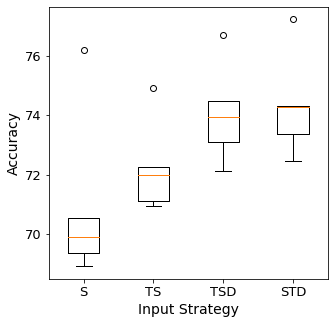

In [18]:
input_strategy_labels = ["S", "TS", "TSD", "STD"]
fig = plt.figure(figsize =[5, 5])
plt.boxplot([df_summary[df_summary["Input_Strategy"]=="1"]["Acc_avg"], df_summary[df_summary["Input_Strategy"]=="2"]["Acc_avg"], df_summary[df_summary["Input_Strategy"]=="3"]["Acc_avg"], df_summary[df_summary["Input_Strategy"]=="4"]["Acc_avg"]])
plt.xticks(input_strategies, input_strategy_labels)
plt.xlabel('Input Strategy',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.tick_params(axis='y', labelsize=13)
plt.tick_params(axis='x', labelsize=13)
#bp = df_summary.boxplot(by="Input_Strategy", column=['Acc_avg'], fontsize=15, figsize=[7, 7])
if subset_labels:
    fig.savefig(f'data/eval_subset/boxplot.svg', format="svg", dpi=300)
else:
    fig.savefig(f'data/eval/boxplot.svg', format="svg", dpi=300)

fig.show()

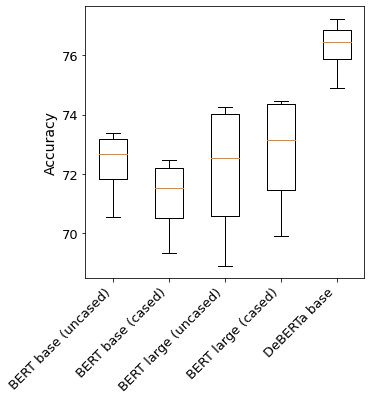

In [19]:
model_names = ["BERT base (uncased)", "BERT base (cased)", "BERT large (uncased)", "BERT large (cased)", "DeBERTa base"]
fig = plt.figure(figsize =[5, 5])
plt.boxplot([df_summary[df_summary["Model"]=="bert-base-uncased"]["Acc_avg"], df_summary[df_summary["Model"]=="bert-base-cased"]["Acc_avg"], df_summary[df_summary["Model"]=="bert-large-uncased"]["Acc_avg"], df_summary[df_summary["Model"]=="bert-large-cased"]["Acc_avg"], df_summary[df_summary["Model"]=="microsoft-deberta-base"]["Acc_avg"]])

#plt.xlabel('Model',fontsize=14)
plt.ylabel('Accuracy',fontsize=14)
plt.tick_params(axis='y', labelsize=13)
plt.tick_params(axis='x', labelsize=13)
plt.xticks([1,2,3,4,5], model_names, rotation=45, ha='right')
if subset_labels:
    fig.savefig(f'data/eval_subset/boxplot_model.svg', format="svg", dpi=300)
else:
    fig.savefig(f'data/eval/boxplot_model.svg', format="svg", dpi=300)

fig.show()